## Simple Linear Regression

Doing regression on tips dataset to find out relation between total bill and tip given

Importing necessary packages

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Loading data on tips from seaborn 

In [2]:
tips = sns.load_dataset("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Regression on total bill and tip given

In [5]:
df = tips[["total_bill","tip"]]

In [6]:
df.head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [7]:
X = np.array(df["total_bill"])
y = np.array(df["tip"])

In [8]:
# First five values of X and y
print(X[:5])
print(y[:5])

[16.99 10.34 21.01 23.68 24.59]
[1.01 1.66 3.5  3.31 3.61]


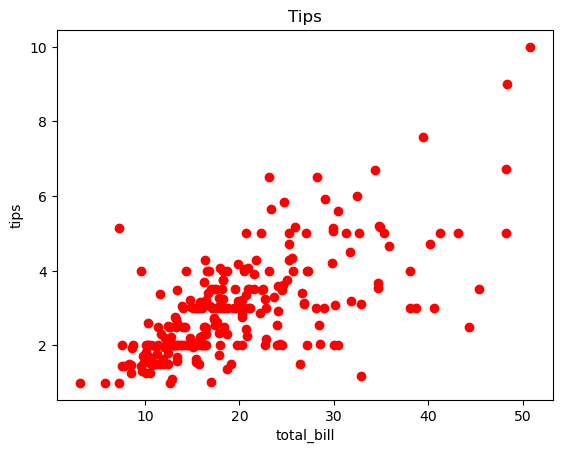

In [9]:
plt.scatter(X, y, c='r')
plt.title("Tips")
plt.xlabel("total_bill")
plt.ylabel("tips")
plt.show()

In [10]:
# Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (195,)
X_test shape: (49,)
y_train shape: (195,)
y_test shape: (49,)


In [12]:
## Computing f(X) = wX + b
def compute_model_output(x, w, b):
    l = x.shape[0]
    f_wb = np.zeros(l)
    for i in range(l):
        f_wb[i] = w * x[i] + b

    return f_wb

In [13]:
def compute_cost(x, y, w, b):
    l = x.shape[0]
    j_wb = 0
    for i in range(l):
        f_wb = w * x[i] + b
        j_wb += (f_wb - y[i])**2

    j_wb = (1/(2*l)) * j_wb
    return j_wb

In [14]:
def compute_gradient(x, y, w, b):
    dw_dj = 0
    db_dj = 0

    l = x.shape[0]
    for i in range(l):
        f_wb = w * x[i] + b
        dw_dj += (f_wb - y[i]) * x[i]
        db_dj += f_wb - y[i]
    
    dw_dj = dw_dj/l
    db_dj = db_dj/l

    return dw_dj,db_dj

In [15]:
def gradient_descent(x, y, w_in, b_in, alpha, compute_cost, compute_gradient, num_iter):

    J_history = []
    p_history = []
    w_temp = 0
    b_temp = 0
    
    for i in range(num_iter):
        dj_dw,dj_db = compute_gradient(x, y, w_in, b_in)

        w_temp = w_in - alpha * dj_dw
        b_temp = b_in - alpha * dj_db
        w_in = w_temp
        b_in = b_temp
        
        J_history.append(compute_cost(x, y, w_in, b_in))
        p_history.append([w_temp, b_temp])

        if i% math.ceil(num_iter/10) == 0:
            '''
            print(f"Iteration {i}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            '''
            print(f"Iteration {i}: Cost {J_history[-1]} ",
                  f"dj_dw: {dj_dw}, dj_db: {dj_db}  ",
                  f"w: {w_in}, b:{b_in}")

    return w_in , b_in, J_history, p_history

In [16]:
w = 0
b = 0
alpha = 0.001
num_iter = 100000

w_final, b_final, J_history, p_history = gradient_descent(X_train, y_train, w, b, alpha, compute_cost, compute_gradient, num_iter)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration 0: Cost 1.9242830461942166  dj_dw: -64.77255948717949, dj_db: -2.9349230769230767   w: 0.0647725594871795, b:0.0029349230769230767
Iteration 10000: Cost 0.5033639840625153  dj_dw: 0.0014218017826275596, dj_db: -0.03349614407441598   w: 0.10282255782268941, b:0.893244830631643
Iteration 20000: Cost 0.5001857869407925  dj_dw: 0.000257145372866847, dj_db: -0.006058072625106623   w: 0.0960124377915228, b:1.0536840455176772
Iteration 30000: Cost 0.5000818284061882  dj_dw: 4.650700512107128e-05, dj_db: -0.0010956557820366928   w: 0.09478076761352128, b:1.0827008903680984
Iteration 40000: Cost 0.5000784279321134  dj_dw: 8.411201417693257e-06, dj_db: -0.00019815899659863707   w: 0.09455800921566117, b:1.0879488422835397
Iteration 50000: Cost 0.5000783167029204  dj_dw: 1.521239846583674e-06, dj_db: -3.5838799535869706e-05   w: 0.09451772139778294, b:1.08889798060126
Iteration 60000: Cost 0.5000783130646235  dj_dw: 2.7512962155366965e-07, dj_db: -6.481762494898337e-06   w: 0.0945104349

Running gradient descent for 50,000 iterations is a good choice as observed the parameters are showing minimal changes. 
This helps in reducing computation time without compromising the effectiveness of the optimization. 

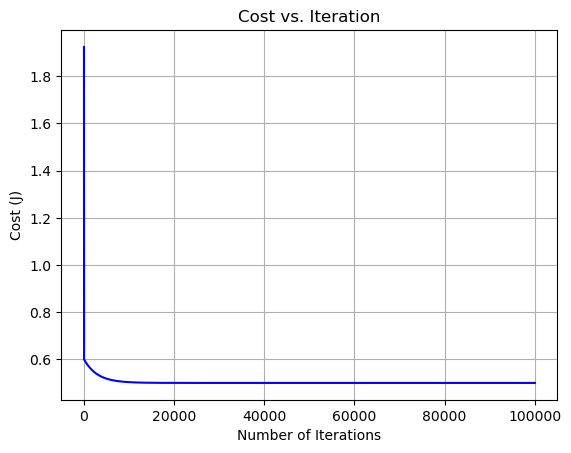

In [17]:
# Plot Cost vs. Iterations
plt.plot(range(num_iter), J_history, 'b')
plt.title('Cost vs. Iteration')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.grid(True)
plt.show()

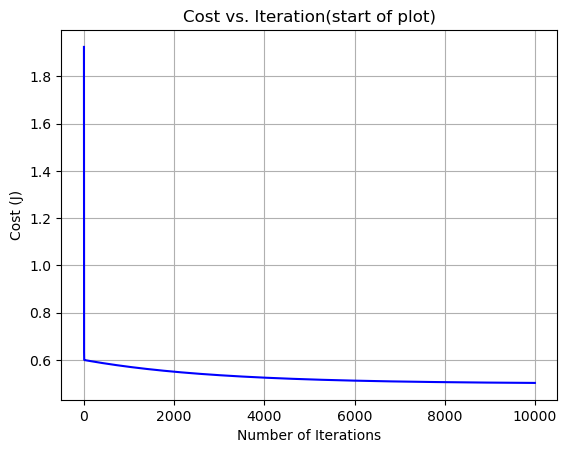

In [18]:
# Plot Cost vs. Iterations 
plt.plot(range(0,10000), J_history[:10000], 'b')
plt.title('Cost vs. Iteration(start of plot)')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.grid(True)
plt.show()

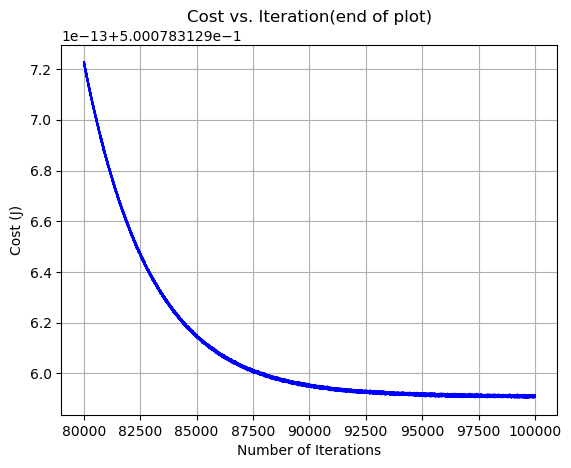

In [19]:
# Plot Cost vs. Iterations 
plt.plot(range(80000,num_iter), J_history[80000:], 'b')
plt.title('Cost vs. Iteration(end of plot)')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.grid(True)
plt.show()

In [20]:
print(X_test[0:5])
print(y_test[0:5])

[ 3.07 18.78 26.59 14.26 21.16]
[1.   3.   3.41 2.5  3.  ]


In [21]:
initial_cost = compute_cost(X_train, y_train, w, b)

# Compute the final cost on the training set after training
final_train_cost = compute_cost(X_train, y_train, w_final, b_final)

# Compute the cost on the test set using the final parameters
final_test_cost = compute_cost(X_test, y_test, w_final, b_final)

print(f"Initial Training Cost: {initial_cost}")
print(f"Final Training Cost: {final_train_cost}")
print(f"Final Test Cost: {final_test_cost}")

Initial Training Cost: 5.159091025641027
Final Training Cost: 0.5000783129415912
Final Test Cost: 0.6149307639688393


In [22]:
compute_cost(X_test, y_test, w_final, b_final)

0.6149307639688393

In [23]:
y_pred = X * w_final + b_final

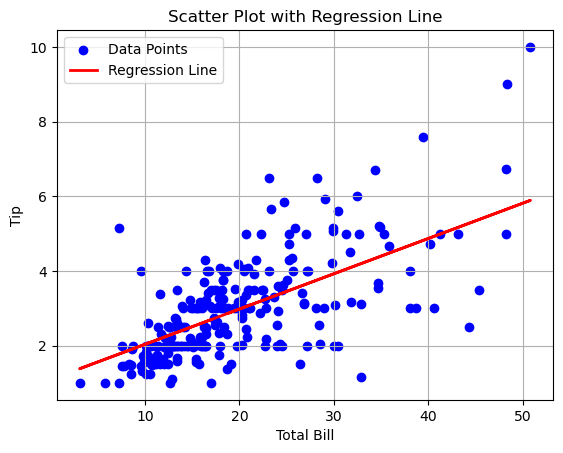

In [24]:
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend()
plt.grid(True)
plt.show()